<a href="https://colab.research.google.com/github/mr-ayush-agrawal/DL_Notebooks/blob/main/Lect/Early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is to demostarate the use of early stopping while making the DL models

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from sklearn.datasets import make_circles

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
# Creating the dataset
x, y = make_circles(n_samples = 150, noise = 0.1, random_state = 1)


In [9]:
model = Sequential()
model.add(Dense(256, input_dim= 2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [11]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [12]:
# this will overfit the model
history = model.fit(x, y, validation_split=0.2, epochs = 3500)

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 38ms/step - loss: 0.3722 - accuracy: 0.8333 - val_loss: 0.5561 - val_accuracy: 0.7667
Epoch 1002/3500
4/4 [==============================] - 0s 42ms/step - loss: 0.3713 - accuracy: 0.8500 - val_loss: 0.5577 - val_accuracy: 0.7667
Epoch 1003/3500
4/4 [==============================] - 0s 62ms/step - loss: 0.3718 - accuracy: 0.8417 - val_loss: 0.5588 - val_accuracy: 0.8000
Epoch 1004/3500
4/4 [==============================] - 0s 64ms/step - loss: 0.3714 - accuracy: 0.8417 - val_loss: 0.5591 - val_accuracy: 0.7667
Epoch 1005/3500
4/4 [==============================] - 0s 50ms/step - loss: 0.3710 - accuracy: 0.8500 - val_loss: 0.5595 - val_accuracy: 0.7667
Epoch 1006/3500
4/4 [==============================] - 0s 21ms/step - loss: 0.3717 - accuracy: 0.8417 - val_loss: 0.5615 - val_accuracy: 0.8000
Epoch 1007/3500
4/4 [==============================] - 0s 16ms/step - loss: 0.3730 - accuracy: 0.8417

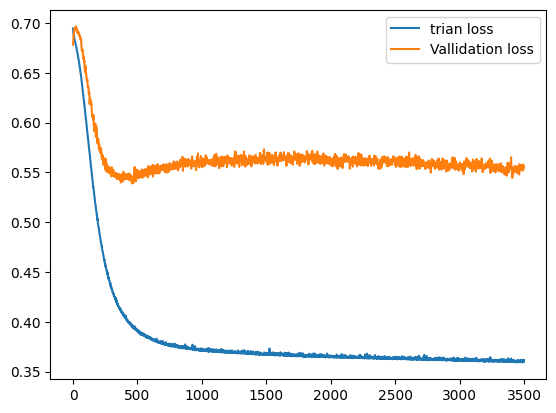

In [18]:
plt.plot(history.history['loss'], label = 'trian loss')
plt.plot(history.history['val_loss'], label = 'Vallidation loss')
plt.legend()

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

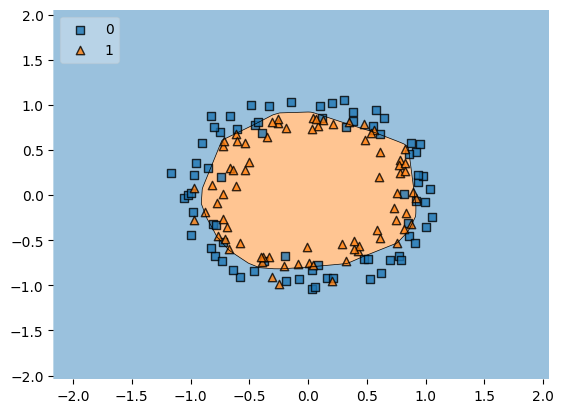

In [20]:
plot_decision_regions(x, y.ravel(), clf = model, legend = 2)

### Early stopping

In [26]:
model = Sequential()
model.add(Dense(256, input_dim= 2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [27]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [30]:
callBack = EarlyStopping(monitor='val_loss',
                         min_delta = 0.000001,
                         patience=20,
                         verbose = 1,
                         mode = 'auto',
                         baseline = None,
                         restore_best_weights = False)

In [31]:
history = model.fit(x, y, validation_split=0.2, epochs = 3500, callbacks = callBack)

Epoch 1/3500
4/4 [==============================] - 0s 43ms/step - loss: 0.6817 - accuracy: 0.5250 - val_loss: 0.7023 - val_accuracy: 0.5333
Epoch 2/3500
4/4 [==============================] - 0s 16ms/step - loss: 0.6812 - accuracy: 0.5333 - val_loss: 0.7011 - val_accuracy: 0.5333
Epoch 3/3500
4/4 [==============================] - 0s 13ms/step - loss: 0.6807 - accuracy: 0.5333 - val_loss: 0.7013 - val_accuracy: 0.5333
Epoch 4/3500
4/4 [==============================] - 0s 17ms/step - loss: 0.6801 - accuracy: 0.5250 - val_loss: 0.7021 - val_accuracy: 0.5333
Epoch 5/3500
4/4 [==============================] - 0s 13ms/step - loss: 0.6796 - accuracy: 0.5250 - val_loss: 0.7009 - val_accuracy: 0.5333
Epoch 6/3500
4/4 [==============================] - 0s 18ms/step - loss: 0.6790 - accuracy: 0.5333 - val_loss: 0.7012 - val_accuracy: 0.5333
Epoch 7/3500
4/4 [==============================] - 0s 19ms/step - loss: 0.6785 - accuracy: 0.5500 - val_loss: 0.7003 - val_accuracy: 0.5333
Epoch 8/3500


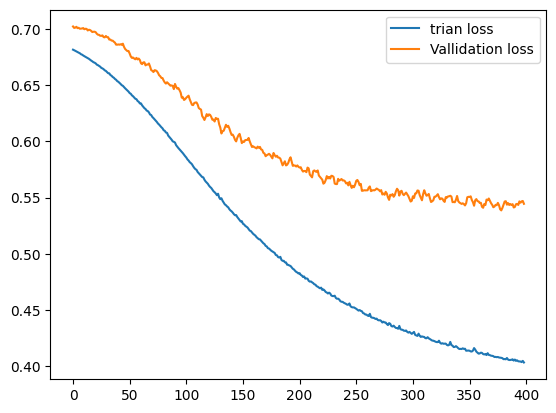

In [32]:
plt.plot(history.history['loss'], label = 'trian loss')
plt.plot(history.history['val_loss'], label = 'Vallidation loss')
plt.legend()

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

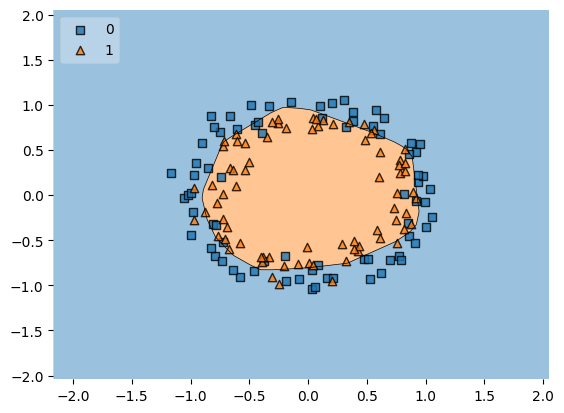

In [33]:
plot_decision_regions(x, y.ravel(), clf = model, legend = 2)